### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

from evaluation_metrics.loss_functions import compute_error
from kernel_methods.local_var import LocalVariance

array([[ 9.43551959],
       [13.02801783],
       [13.2125824 ],
       [14.25111964],
       [13.67851917],
       [10.64393629],
       [ 9.74166181],
       [ 8.6610177 ],
       [11.73564815],
       [13.2377994 ],
       [13.57617479],
       [11.09142462],
       [10.34645249],
       [11.42831553],
       [10.33500678],
       [12.45179092],
       [14.37248113],
       [ 7.71827623],
       [11.68748527],
       [12.19378717],
       [ 7.23088753],
       [ 6.80175972],
       [ 8.9165621 ],
       [ 8.98705769],
       [10.01384632],
       [ 8.82036007],
       [ 9.37347312],
       [ 8.25880169],
       [12.70072775],
       [ 9.09891942],
       [ 7.58617383],
       [ 6.44511319],
       [ 8.54265611],
       [11.84751673],
       [ 9.16763548],
       [12.25057185],
       [12.55503123],
       [ 8.36758834],
       [ 9.94183054],
       [11.23744561],
       [ 8.11990508],
       [10.07940658],
       [10.16263325],
       [10.69567525],
       [ 8.98509026],
       [14

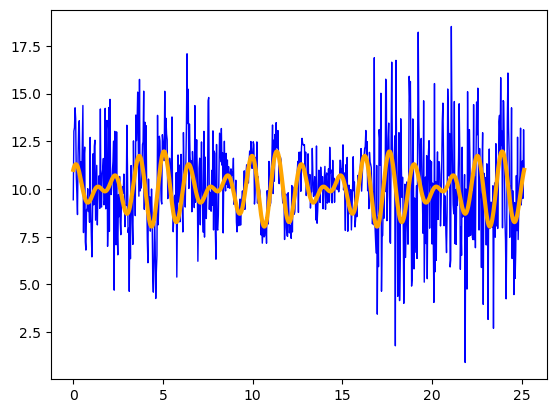

In [2]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 3 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 3 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    # x[0:n] = np.sin(4*t1) + np.random.normal(0, 0.5, n)+1
    # x[n:2*n] = 3*np.sin(2*t2) + np.random.normal(0, 1.25, n)+2
    # x[2*n:3*n] = 0.5*np.sin(2*t3) + np.random.normal(0, 0.7, n)-0.25*t3+6

    x[0:n] = np.sin(4*t1) +np.cos(5*t1)+ np.random.normal(0, 2, n)+10
    x[n:2*n] = np.sin(4*t2) + np.cos(5*t2)+np.random.normal(0, 1, n)+10
    x[2*n:3*n] = np.sin(4*t3) + np.cos(5*t3)+np.random.normal(0, 3, n)+10



    true_fun=np.sin(4*t) +np.cos(5*t)+10


    return x, t, true_fun
    

x,t,true_fun=generate_spatially_inhomogenous_data()

plt.plot(t,x,color='blue',lw=1)
plt.plot(t,true_fun,color='orange',lw=3)

x=x.reshape(-1,1)
x


### Analysis of Initial Differences

 WARNING Condition number is large: 10113486456.115803


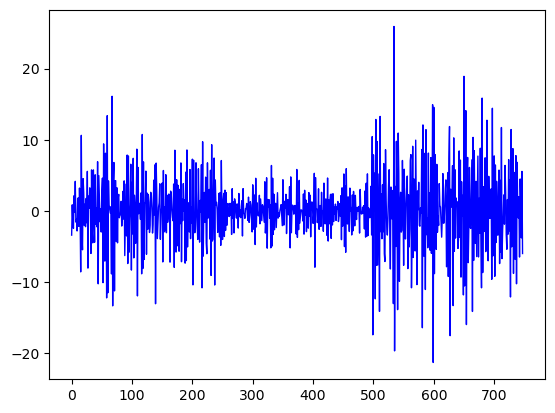

In [5]:
D= Difference_Matrix(len(t),1)

diff=D.D.dot(x)

plt.plot(diff,color='blue',lw=1)

### Piecewise Linear Comparison

In [3]:
D=Difference_Matrix(len(t), 1)

best_lambda=cross_validation(x,D,10,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.4799478778346739
Performing cross validation for lambda = 1.335483480038229
Performing cross validation for lambda = 3.7160621138726624
Performing cross validation for lambda = 10.340163574142053
Performing cross validation for lambda = 28.772119373588612
Performing cross validation for lambda = 80.06013128440479
Performing cross validation for lambda = 222.77207104735717
Performing cross validation for lambda = 619.8765208419769
Performing cross validation for lambda = 1724.8432412762845
Performing cross validation for lambda = 4799.478778346739
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 0.29775760442692184
Performing cross validation for lambda = 0.8285282217768015
Performing cross validation for lambda = 2.3054289934989876
Performing cross validation for lambda = 6.414993121981511
Performing cross validation for lambda = 17.850099426663

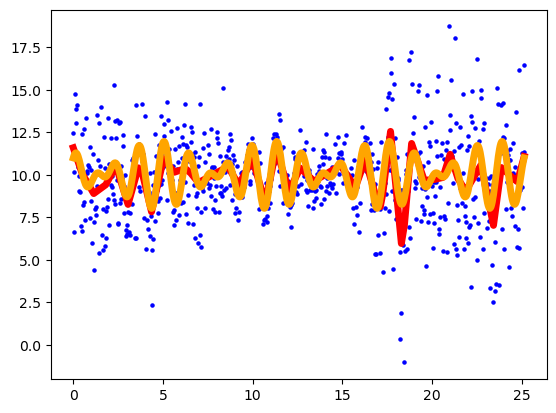

In [4]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [5]:
compute_error(true_fun,sol.flatten())

0.5056836699904564

### Second Order Comparison

In [6]:
D=Difference_Matrix(len(t), 2)

best_lambda=cross_validation(x,D,10,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 4.5022921684803645
Performing cross validation for lambda = 12.527895404888547
Performing cross validation for lambda = 34.85961314874004
Performing cross validation for lambda = 96.99894432432964
Performing cross validation for lambda = 269.905324533829
Performing cross validation for lambda = 751.0275984873715
Performing cross validation for lambda = 2089.778905488072
Performing cross validation for lambda = 5814.933941999945
No solution found for lambda = 5814.933941999945
Status: maxiter exceeded
Performing cross validation for lambda = 16180.399113525293
No solution found for lambda = 16180.399113525293
Status: maxiter exceeded
Performing cross validation for lambda = 45022.921684803645
No solution found for lambda = 45022.921684803645
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 25.031440592597765
Performing cros

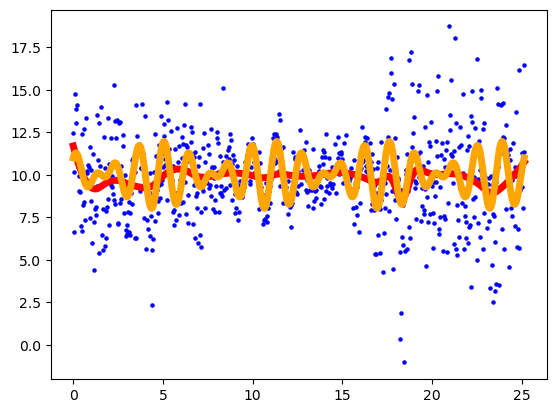

In [7]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [8]:
compute_error(true_fun,sol.flatten())

1.0449316311080306

### Algorithm for Inference

Idea
- Use Kernel to Smooth out Variance
- Apply Piecewise Constant TF on this smoothed volatility

- Use estimates in prior model

In [9]:
local_var=LocalVariance(t,x,0,0.25)
local_var_series=local_var.fit()


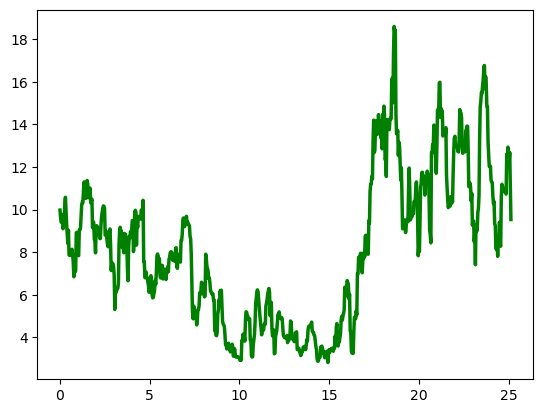

In [10]:
fig, ax = plt.subplots()
ax.plot(t, 4*local_var_series, color="green", label="Local Variance", lw=2.5)  # plots prior


In [11]:
local_var.optimal_bandwidth

0.25

### Apply Piecewise Constant TF on this smoothed volatility

In [12]:
D=Difference_Matrix(len(t), 0)

best_lambda=cross_validation(local_var_series.reshape(-1,1),D,10,5)


Performing  0 out of 5 iterations of cross validation
Performing cross validation for lambda = 0.017429292668576717
Performing cross validation for lambda = 0.04849804218876787
Performing cross validation for lambda = 0.13494868328099374
Performing cross validation for lambda = 0.3755027274790003
Performing cross validation for lambda = 1.0448586449011126
Performing cross validation for lambda = 2.9073812463469872
Performing cross validation for lambda = 8.089961022823474
Performing cross validation for lambda = 22.51079710754661
Performing cross validation for lambda = 62.63763014278079
Performing cross validation for lambda = 174.29292668576716
Performing  1 out of 5 iterations of cross validation
Performing cross validation for lambda = 0.018133008715639522
Performing cross validation for lambda = 0.05045617389200651
Performing cross validation for lambda = 0.1403973010626003
Performing cross validation for lambda = 0.3906638301162425
Performing cross validation for lambda = 1.08704

In [13]:
results=adaptive_tf(local_var_series.reshape(-1,1),D,25)


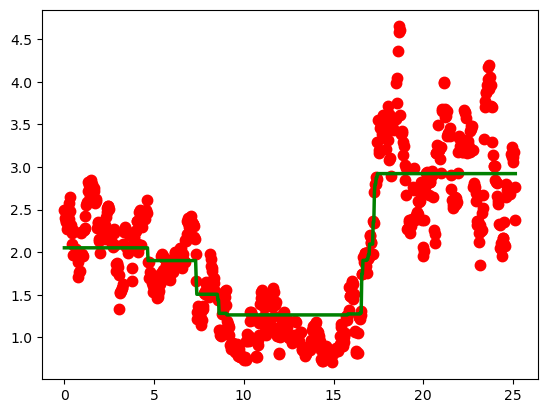

In [14]:
fig, ax = plt.subplots()
ax.plot(t, results['sol'].x, color="green", label="Local Variance", lw=2.5)  # plots prior
ax.scatter(t, local_var_series, color="red", label="Data", lw=2.5)  # plots prior

In [15]:
def extract_sol(x:np.ndarray):
    x=np.round(x,1)

    x=np.unique(x)




    return x

extract_sol(results['sol'].x)

array([1.3, 1.4, 1.5, 1.7, 1.9, 2. , 2.1, 2.4, 2.7, 2.8, 2.9])

In [16]:
prior=np.concatenate(results['sol'].x)

D=Difference_Matrix(len(t), 2,prior=prior)

D.D

array([[ 2.05177035, -6.15531104,  6.15531104, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.05177035, -6.15531104, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.05177035, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -2.9221577 ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  8.76647311,
        -2.9221577 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -8.76647311,
         8.76647311, -2.9221577 ]])

In [17]:
best_lambda=cross_validation(x,D,10,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 14.369304504811927
Performing cross validation for lambda = 39.983443353041636
Performing cross validation for lambda = 111.2563062346219
Performing cross validation for lambda = 309.5772809679821
Performing cross validation for lambda = 861.4171738671757
Performing cross validation for lambda = 2396.9444563668008
Performing cross validation for lambda = 6669.640333631682
No solution found for lambda = 6669.640333631682
Status: negative duality gap
Performing cross validation for lambda = 18558.67041968669
No solution found for lambda = 18558.67041968669
Status: negative duality gap
Performing cross validation for lambda = 51640.602868762464
No solution found for lambda = 51640.602868762464
Status: maxiter exceeded
Performing cross validation for lambda = 143693.04504811927
No solution found for lambda = 143693.04504811927
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross va

In [18]:
best_lambda

8294.574895165955

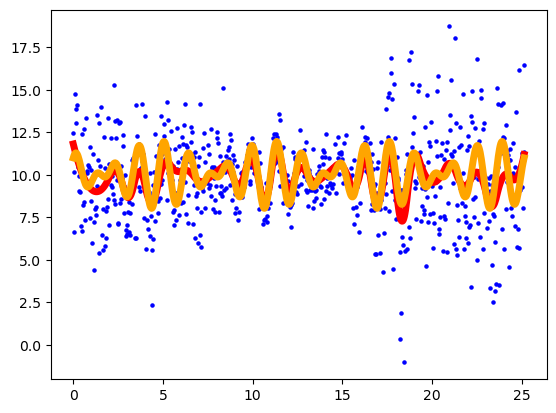

In [19]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [20]:
compute_error(true_fun,sol.flatten())

0.4738954811611463